# Analysis of Molecular Dynamics Simulations Elucidates Interplay Between Allosteric and Active Sites in a Model Ligand- gated Ion Channel

In [2]:
#Modules
from __future__ import print_function
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [19]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5','4HFI_F238L_pH46_md4']

## Data preparation

### Building basic dataframe

In [3]:
def create_md_dataframe():    
    md_data = pd.DataFrame(columns=list(['MD_name','pH','replicate','traj_time']))
    return md_data

In [9]:
def create_metadata(md_data= None):   
    def append_metadata(traj_note,location = 'pdc/',skip=10,md_data= md_data):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        if skip == 1:
            traj = md.load(location + traj_location,top= location + top_location,stride=10)
        else:
            traj = md.load(location + traj_location,top= location + top_location)
        print("In " + traj_note + ", simulation runs " + str(10 * traj.n_frames) + " ns.")
        md_name = traj_note[:traj_note.find('pH')-1]
        pH = traj_note[traj_note.find('pH')+2:traj_note.find('pH')+4]
        md_replicate = traj_note[-1]
        for i in range(0,traj.n_frames):
            md_data.loc[md_data.shape[0]+1] = [md_name,pH,md_replicate,i]

    for traj_note in traj_notes:
        append_metadata(traj_note)

In [10]:
def create_system_notation(md_data = None):
    system_notation = 0
    notation = -1
    location = 'pdc/'
    skip=10
    notations = []
    increment = 0
    for traj_note in traj_notes:
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top= location + top_location)
        if traj_note.find('md1') >= 0:
            notation = notation + 1
        if traj_note == '5NJY_I233T_pH70_md4' or traj_note == '4NPQ_pH70_md5' or  traj_note == '4NPQ_F238L_pH70_md3' or traj_note == '4NPQ_I233T_pH70_md3' or traj_note == '4NPQ_F238LI233T_pH70_md3' or traj_note == '4HFI_F238L_pH46_md4':
            notation = notation + 1

        for frame in range(0,traj.n_frames):
            notations.append(notation)
        #if increment % 3 == 2:
        #    notation = notation + 1
        #increment = increment + 1 
        
    md_data['system'] = notations

In [13]:
md_data = create_md_dataframe()
create_metadata(md_data= md_data)
create_system_notation(md_data = md_data)

In 5NJY_pH70_md1, simulation runs 1030 ns.
In 5NJY_pH70_md2, simulation runs 750 ns.
In 5NJY_pH70_md3, simulation runs 810 ns.
In 5NJY_F238L_pH70_md1, simulation runs 540 ns.
In 5NJY_F238L_pH70_md2, simulation runs 900 ns.
In 5NJY_F238L_pH70_md3, simulation runs 720 ns.
In 5NJY_I233T_pH70_md4, simulation runs 860 ns.
In 5NJY_I233T_pH70_md2, simulation runs 590 ns.
In 5NJY_I233T_pH70_md3, simulation runs 820 ns.
In 5NJY_F238LI233T_pH70_md1, simulation runs 830 ns.
In 5NJY_F238LI233T_pH70_md2, simulation runs 800 ns.
In 5NJY_F238LI233T_pH70_md3, simulation runs 880 ns.
In 5NJY_pH46_md1, simulation runs 1020 ns.
In 5NJY_pH46_md2, simulation runs 1060 ns.
In 5NJY_pH46_md3, simulation runs 1030 ns.
In 5NJY_F238L_pH46_md1, simulation runs 930 ns.
In 5NJY_F238L_pH46_md2, simulation runs 950 ns.
In 5NJY_F238L_pH46_md3, simulation runs 1090 ns.
In 5NJY_I233T_pH46_md1, simulation runs 810 ns.
In 5NJY_I233T_pH46_md2, simulation runs 870 ns.
In 5NJY_I233T_pH46_md3, simulation runs 980 ns.
In 5NJY_

### Append feature

### RMSD

In [40]:
def create_rmsd_data(md_data= None,ref_name = None,select_domain = None):
    def append_rmsd_data(traj_note,location = 'pdc/',ref_name = None, skip=10):
        residue_selection_1 = "resSeq 13 to 198"
        residue_selection_2 = "resSeq 198 to 316"
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top= location + top_location)
        if select_domain == 'TMD':
            traj = traj.atom_slice(traj.topology.select(residue_selection_2))
        elif select_domain == 'ECD':
            traj = traj.atom_slice(traj.topology.select(residue_selection_1))

        if ref_name != None:
            ref_location = ("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/" + ref_name + "_1.mer.pdb")
        else:
            ref_location = location + top_location
        ref_traj = md.load(ref_location)
        if select_domain == 'TMD':
            ref_traj = ref_traj.atom_slice(ref_traj.topology.select(residue_selection_2))
        elif select_domain == 'ECD':
            ref_traj = ref_traj.atom_slice(ref_traj.topology.select(residue_selection_1))
        if traj.n_atoms != ref_traj.n_atoms:
            traj = traj.atom_slice(traj.topology.select(residue_selection))
        traj.superpose(ref_traj,0)
        rmsd_data.extend(list(md.rmsd(traj, ref_traj)*10))
    rmsd_data = []
    for traj_note in traj_notes:
        append_rmsd_data(traj_note,ref_name = ref_name)
    if select_domain == 'TMD':
        md_data['tmd_rmsd']= rmsd_data
    elif select_domain == 'ECD':
        md_data['ecd_rmsd']= rmsd_data
    elif ref_name != None:
        md_data['rmsd' + str(ref_name)]= rmsd_data
    else:
        md_data['rmsd']= rmsd_data

In [41]:
create_rmsd_data(md_data)

### PCA

In [42]:
def create_cppca_data(md_data = None,residue_selection_1 = "resSeq 13 to 198", residue_selection_2 = "resSeq 198 to 316"):
    def combined_ppca_reduced_cartesian(residue_selection_1 = "resSeq 13 to 198", residue_selection_2 = "resSeq 198 to 316"):
        wholetraj = md.load("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/new_ensemble.pdb")
        wholetraj.superpose(wholetraj,18)
        topology = wholetraj.topology
        wholetraj_sliced_ecd = wholetraj.atom_slice(topology.select(residue_selection_1))
        wholetraj_sliced_ecd.superpose(wholetraj_sliced_ecd,18)
        wholetraj_sliced_tmd = wholetraj.atom_slice(topology.select(residue_selection_2))
        wholetraj_sliced_tmd.superpose(wholetraj_sliced_tmd,18)
        ppca_ecd = PCA(n_components=2)
        ppca_tmd = PCA(n_components=2)
        partial_reduced_cartesian = [ppca_ecd.fit_transform(wholetraj_sliced_ecd.xyz.reshape(wholetraj_sliced_ecd.n_frames, wholetraj_sliced_ecd.n_atoms * 3)), ppca_tmd.fit_transform(wholetraj_sliced_tmd.xyz.reshape(wholetraj_sliced_tmd.n_frames, wholetraj_sliced_tmd.n_atoms * 3))]    
        return partial_reduced_cartesian, wholetraj_sliced_ecd, wholetraj_sliced_tmd,ppca_ecd,ppca_tmd
    
    def append_projection_on_combined_ppca_data(traj_note, location = 'pdc/',skip = 10, residue_selection_1 = "resSeq 13 to 198", residue_selection_2 = "resSeq 198 to 316"):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top= location + top_location)
        topology = traj.topology
        traj_sliced_ecd = traj.atom_slice(topology.select(residue_selection_1))
        traj_sliced_tmd = traj.atom_slice(topology.select(residue_selection_2))

        traj_sliced_ecd.superpose(wholetraj_sliced_ecd,18)
        traj_sliced_tmd.superpose(wholetraj_sliced_tmd,18)

        reduced_cartesian_ecd_pc1.extend(ppca_ecd.transform(traj_sliced_ecd.xyz.reshape(traj_sliced_ecd.n_frames, traj_sliced_ecd.n_atoms * 3)).T[0])
        reduced_cartesian_ecd_pc2.extend(ppca_ecd.transform(traj_sliced_ecd.xyz.reshape(traj_sliced_ecd.n_frames, traj_sliced_ecd.n_atoms * 3)).T[1])
        reduced_cartesian_tmd_pc1.extend(ppca_tmd.transform(traj_sliced_tmd.xyz.reshape(traj_sliced_tmd.n_frames, traj_sliced_tmd.n_atoms * 3)).T[0])
        reduced_cartesian_tmd_pc2.extend(ppca_tmd.transform(traj_sliced_tmd.xyz.reshape(traj_sliced_tmd.n_frames, traj_sliced_tmd.n_atoms * 3)).T[1])

    partial_reduced_cartesian, wholetraj_sliced_ecd,wholetraj_sliced_tmd, ppca_ecd,ppca_tmd = combined_ppca_reduced_cartesian(residue_selection_1,residue_selection_2)
    
    reduced_cartesian_ecd_pc1 = []
    reduced_cartesian_ecd_pc2 = []
    reduced_cartesian_tmd_pc1 = []
    reduced_cartesian_tmd_pc2 = []

    for traj_note in traj_notes:
        append_projection_on_combined_ppca_data(traj_note)
    md_data['ecd_pc1']= reduced_cartesian_ecd_pc1
    md_data['ecd_pc2']= reduced_cartesian_ecd_pc2
    md_data['tmd_pc1']= reduced_cartesian_tmd_pc1
    md_data['tmd_pc2']= reduced_cartesian_tmd_pc2

In [44]:
create_cppca_data(md_data)

In [46]:
def create_pca_data(md_data = None):
    def ensemble_pca_cartesian():
        wholetraj = md.load("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/new_ensemble.pdb")
        wholetraj = wholetraj.atom_slice(wholetraj.topology.select("resSeq 13 to 316"))
        wholetraj.superpose(wholetraj,18)
        pca = PCA(n_components=5)
        reduced_cartesian = pca.fit_transform(wholetraj.xyz.reshape(wholetraj.n_frames,wholetraj.n_atoms *3))
        return wholetraj, pca
    def append_pca_data(traj_note,location = 'pdc/',skip = 10):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top =location + top_location)
        topology = traj.topology
        traj = traj.atom_slice(topology.select("resSeq 13 to 316"))
        traj.superpose(wholetraj,18)
        traj_reduced_cartesian = pca.transform(traj.xyz.reshape(traj.n_frames,traj.n_atoms * 3))
        pca1.extend(traj_reduced_cartesian.T[0])
        pca2.extend(traj_reduced_cartesian.T[1])
        pca3.extend(traj_reduced_cartesian.T[2])
        pca4.extend(traj_reduced_cartesian.T[3])
        pca5.extend(traj_reduced_cartesian.T[4])


    pca1 = []
    pca2 = []
    pca3 = []
    pca4 = []
    pca5 = []
    wholetraj, pca = ensemble_pca_cartesian()
    for traj_note in traj_notes:
        append_pca_data(traj_note)
    md_data['wholepca_pc1'] = pca1
    md_data['wholepca_pc2'] = pca2
    md_data['wholepca_pc3'] = pca3
    md_data['wholepca_pc4'] = pca4
    md_data['wholepca_pc5'] = pca5


In [47]:
create_pca_data(md_data)

In [48]:
def create_cppca_data_m2(md_data = None,residue_selection_2 = "(resSeq 230 to 250)"):
    def combined_ppca_reduced_cartesian(residue_selection_2 = "(resSeq 230 to 250)"):
        wholetraj = md.load("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/new_ensemble.pdb")
        wholetraj.superpose(wholetraj,18)
        topology = wholetraj.topology
        wholetraj_sliced_tmd = wholetraj.atom_slice(topology.select(residue_selection_2))
        wholetraj_sliced_tmd.superpose(wholetraj_sliced_tmd,18)
        ppca_tmd = PCA(n_components=5)
        ppca_tmd.fit(wholetraj_sliced_tmd.xyz.reshape(wholetraj_sliced_tmd.n_frames, wholetraj_sliced_tmd.n_atoms * 3))
        print(ppca_tmd.explained_variance_ratio_)
        return wholetraj_sliced_tmd, ppca_tmd
    
    def append_projection_on_combined_ppca_data(traj_note, location = 'pdc/',skip = 10, residue_selection_2 = "(resSeq 230 to 250)"):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top= location + top_location)
        topology = traj.topology
        traj_sliced_tmd = traj.atom_slice(topology.select(residue_selection_2))
        traj_sliced_tmd.superpose(wholetraj_sliced_tmd,18)
        reduced_cartesian_tmd_pc1.extend(ppca_tmd.transform(traj_sliced_tmd.xyz.reshape(traj_sliced_tmd.n_frames, traj_sliced_tmd.n_atoms * 3)).T[0])
        reduced_cartesian_tmd_pc2.extend(ppca_tmd.transform(traj_sliced_tmd.xyz.reshape(traj_sliced_tmd.n_frames, traj_sliced_tmd.n_atoms * 3)).T[1])
        reduced_cartesian_tmd_pc3.extend(ppca_tmd.transform(traj_sliced_tmd.xyz.reshape(traj_sliced_tmd.n_frames, traj_sliced_tmd.n_atoms * 3)).T[2])
        reduced_cartesian_tmd_pc4.extend(ppca_tmd.transform(traj_sliced_tmd.xyz.reshape(traj_sliced_tmd.n_frames, traj_sliced_tmd.n_atoms * 3)).T[3])
        reduced_cartesian_tmd_pc5.extend(ppca_tmd.transform(traj_sliced_tmd.xyz.reshape(traj_sliced_tmd.n_frames, traj_sliced_tmd.n_atoms * 3)).T[4])

    wholetraj_sliced_tmd,ppca_tmd = combined_ppca_reduced_cartesian(residue_selection_2)
    
    reduced_cartesian_tmd_pc1 = []
    reduced_cartesian_tmd_pc2 = []
    reduced_cartesian_tmd_pc3 = []
    reduced_cartesian_tmd_pc4 = []
    reduced_cartesian_tmd_pc5 = []


    for traj_note in traj_notes:
        append_projection_on_combined_ppca_data(traj_note)
    md_data['m2_pc1']= reduced_cartesian_tmd_pc1
    md_data['m2_pc2']= reduced_cartesian_tmd_pc2
    md_data['m2_pc3']= reduced_cartesian_tmd_pc3
    md_data['m2_pc4']= reduced_cartesian_tmd_pc4
    md_data['m2_pc5']= reduced_cartesian_tmd_pc5
    

In [49]:
create_cppca_data_m2(md_data)

[ 0.73159707  0.18387465  0.0516021   0.00936811  0.00758874]


### Gating feature

In [19]:
def create_ecd_twist_data(md_data = None):
    def wiki_dihedral(p):
        p0 = p[0]
        p1 = p[1]
        p2 = p[2]
        p3 = p[3]
        b0 = -1.0*(p1 - p0)
        b1 = p2 - p1
        b2 = p3 - p2
        b0xb1 = np.cross(b0, b1)
        b1xb2 = np.cross(b2, b1)
        b0xb1_x_b1xb2 = np.cross(b0xb1, b1xb2)

        y = np.dot(b0xb1_x_b1xb2, b1)*(1.0/np.linalg.norm(b1))
        x = np.dot(b0xb1, b1xb2)
        return np.degrees(np.arctan2(y, x))

    def append_ecd_twist(traj_note,location = '/media/scottzhuang/data/MD/',skip = 10):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top= location + top_location)        
        traj.superpose(traj,0)
        topology = traj.topology
        residue_selection_1 = "resSeq 13 to 198"
        residue_selection_2 = "resSeq 198 to 316"
        traj_sliced_ecd = traj.atom_slice(topology.select(residue_selection_1))
        traj_sliced_tmd = traj.atom_slice(topology.select(residue_selection_2))
        
        ecd_twist = []
        for chain in range (0,5):
            di_angle = []

            for i in range(0,traj.n_frames):
                cen_mass_ecd = md.compute_center_of_mass(traj_sliced_ecd[i])[0]
                cen_mass_tmd = md.compute_center_of_mass(traj_sliced_tmd[i])[0]
                residue_selection_3 = "resid " + str(8+chain*311) + " to " + str(192+chain*311)
                residue_selection_4 = "resid " + str(192+chain*311) + " to " + str(310+chain*311)
                traj_sliced_ecd_chain = traj.atom_slice(topology.select(residue_selection_3))
                traj_sliced_tmd_chain = traj.atom_slice(topology.select(residue_selection_4))
                cen_mass_ecd_chain = md.compute_center_of_mass(traj_sliced_ecd_chain[i])[0]
                cen_mass_tmd_chain = md.compute_center_of_mass(traj_sliced_tmd_chain[i])[0]
                di_angle.append(wiki_dihedral(np.asarray([(cen_mass_ecd_chain).tolist(),(cen_mass_ecd).tolist(),(cen_mass_tmd).tolist(),(cen_mass_tmd_chain).tolist()])))
            ecd_twist.append(di_angle)
        ecd_twist_data.extend(np.mean(np.asarray(ecd_twist),axis=0))
    ecd_twist_data = []
    for traj_note in traj_notes:
        append_ecd_twist(traj_note)
    md_data['ECD twist']= ecd_twist_data

In [20]:
def create_helix_tilt_data(md_data = None):
    def append_helix_tilt_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        tilt_data = pd.read_csv(location + traj_note + '/' + traj_note + '.tilt.csv',sep=" ")
        tilt_data.columns = ['traj_time','avg','ang1','ang2','ang3','ang4','ang5']
        helix_tilt_data.extend(tilt_data['avg'])
    helix_tilt_data = []
    for traj_note in traj_notes:
        append_helix_tilt_data(traj_note)
    md_data['helix tilt angle'] = helix_tilt_data

In [21]:
def create_helix_twist_data(md_data = None):
    def append_helix_twist_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        twist = pd.read_csv(location + traj_note + '/' + traj_note + '.twist.csv',sep=" ")
        twist.columns = ['traj_time','avg','ang1','ang2','ang3','ang4','ang5']
        helix_twist_data.extend(twist['avg'])
    helix_twist_data = []
    for traj_note in traj_notes:
        append_helix_twist_data(traj_note)
    md_data['helix twist angle'] = helix_twist_data

In [22]:
def create_beta_expansion(md_data = None):
    def append_beta_expansion_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        distance = []
        for chain in range(0,5):
            distance.append(md.compute_distances(traj,[[27 + chain * 311,187 + chain * 311]]))
        beta_expansion_data.extend(np.mean(distance,axis=0).T[0])
    beta_expansion_data = []
    for traj_note in traj_notes:
        append_beta_expansion_data(traj_note)
    md_data['beta_expansion'] = beta_expansion_data

In [23]:
def create_M2_radius(md_data = None):
    def append_M2_radius_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        topology = traj.topology
        M2_selection = 'resSeq 231 to 245'
        traj_M2 = traj.atom_slice(topology.select(M2_selection))
        M2_radius_data.extend(md.compute_rg(traj_M2).T) 
    M2_radius_data = []
    for traj_note in traj_notes:
        append_M2_radius_data(traj_note)
    md_data['M2_radius'] = M2_radius_data

In [24]:
def create_ECD_radius(md_data = None):
    def append_ECD_radius_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        topology = traj.topology
        ECD_selection = 'resSeq 5 to 194'
        traj_ECD = traj.atom_slice(topology.select(ECD_selection))
        ECD_radius_data.extend(md.compute_rg(traj_ECD).T) 
    ECD_radius_data = []
    for traj_note in traj_notes:
        append_ECD_radius_data(traj_note)
    md_data['ECD_radius'] = ECD_radius_data

In [25]:
def create_M2_M1_distance(md_data = None):
    def distance_calculate(x,y):
        dist = np.sqrt(np.power(x[0]-y[0],2) + np.power(x[1]-y[1],2) + np.power(x[2]-y[2],2))
        return dist
    def append_M2_M1_distance_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        topology = traj.topology
        distance = []
        for chain in range(0,4):
            M1_selection = 'resid ' + str(192 + chain * 311) + ' to ' + str(196 + chain * 311)
            M2_selection = 'resid ' + str(233 + (chain + 1) * 311) + ' to ' + str(238 + (chain + 1) * 311)
            traj_M1 = traj.atom_slice(topology.select(M1_selection))
            traj_M2 = traj.atom_slice(topology.select(M2_selection))
            distance.append(distance_calculate(md.compute_center_of_mass(traj_M1).T,md.compute_center_of_mass(traj_M2).T))
        M1_selection = 'resid ' + str(192 + 4 * 311) + ' to ' + str(196 + 4 * 311)
        M2_selection = 'resid ' + str(233) + ' to ' + str(238)
        traj_M1 = traj.atom_slice(topology.select(M1_selection))
        traj_M2 = traj.atom_slice(topology.select(M2_selection))
        distance.append(distance_calculate(md.compute_center_of_mass(traj_M1).T,md.compute_center_of_mass(traj_M2).T))
        #print((np.mean(np.asarray(distance),axis=0))
        M2_M1_distance.extend(np.mean(distance,axis=0))
    M2_M1_distance = []
    for traj_note in traj_notes:
        append_M2_M1_distance_data(traj_note)
    md_data['M2_M1_distance'] = M2_M1_distance
    #print(M2_M1_distance)

In [26]:
def create_M1_kink(md_data = None):
    def angle_calculate(x,y,z):
        angle_set = []
        for i in range(0,x.shape[0]):
            angle_set.append(180 - 57.29 * np.arccos(np.dot((x[i]-y[i]),(z[i]-y[i]))/(np.linalg.norm(x[i]-y[i]) * np.linalg.norm(z[i]-y[i]))))
        return angle_set
    def append_M1_kink_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        topology = traj.topology
        angle = []
        for chain in range(0,5):
            M1_selection_up = 'resid ' + str(192 + chain * 311) + ' to ' + str(196 + chain * 311)
            M1_selection_mid = 'resid ' + str(194 + chain * 311) + ' to ' + str(198 + chain * 311)
            M1_selection_down = 'resid ' + str(197 + chain * 311) + ' to ' + str(208 + chain * 311)

            M1_up = traj.atom_slice(topology.select(M1_selection_up))
            M1_mid = traj.atom_slice(topology.select(M1_selection_mid))
            M1_down = traj.atom_slice(topology.select(M1_selection_down))
            angle.append(angle_calculate(md.compute_center_of_mass(M1_up), md.compute_center_of_mass(M1_mid), md.compute_center_of_mass(M1_down)))
        M1_kink.extend(np.mean(angle,axis=0))
    M1_kink = []
    for traj_note in traj_notes:
        append_M1_kink_data(traj_note)
    md_data['M1_kink'] = M1_kink


In [32]:
def create_M2_spread(md_data = None):
    def distance_calculate(x,y):
        dist = np.sqrt(np.power(x[0]-y[0],2) + np.power(x[1]-y[1],2) + np.power(x[2]-y[2],2))
        return dist
    def append_M2_spread_data(traj_note,location = 'pdc/', skip=10):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        topology = traj.topology
        distance = []
        for chain in range(0,5):
            M2_selection = 'resid ' + str(236 + chain * 311) + ' to ' + str(240 + chain * 311)
            TMD_selection = 'resSeq 198 to 315'

            M2 = traj.atom_slice(topology.select(M2_selection))
            TMD = traj.atom_slice(topology.select(TMD_selection))
            distance.append(distance_calculate(md.compute_center_of_mass(M2).T, md.compute_center_of_mass(TMD).T))
        M2_spread.extend(np.mean(distance,axis=0))
    M2_spread = []
    for traj_note in traj_notes:
        append_M2_spread_data(traj_note)
    print(len(M2_spread))
    md_data['M2_spread'] = M2_spread


In [33]:
create_M2_spread(md_data)

4610


In [27]:
def create_pore_profile(md_data = None):
    def pore_rad(traj_note,location = '/media/scottzhuang/data/MD/'):
        top_location = traj_note + '/' + traj_note + ".protein.gro"
        traj_name = traj_note + '/' + traj_note +  ".skip10.protein.xtc"    
        traj = md.load(location + traj_name,top = location +top_location)
        ca_top_location = traj_note + '/' + traj_note +  ".ca.pdb"
        ca_traj_name = traj_note + '/' + traj_note +  ".skip10.ca.xtc"    
        ca_traj = md.load(location + ca_traj_name,top = location + ca_top_location)
        topology = traj.topology
        pore_profile = pd.DataFrame(columns=['traj_time','resid','pore_radius'])
        m = 0
        incre = 0
        for i in [217,221,225,228,232,235]:
            group_1 = np.arange(i,i + 1245, 311)
            xyz_inter = np.mean(ca_traj.xyz[:,group_1],axis=1)
            chain = topology.add_chain()
            residue = topology.add_residue('ALA',chain)
            topology.add_atom('H','H',residue)
            traj.topology = topology
            traj.xyz = np.append(traj.xyz,xyz_inter.reshape([traj.n_frames,1,3]),axis=1)
            pairs = list(itertools.product(group_1,[1555 + incre]))
            for j in range(0,traj.n_frames):
                pore_profile.loc[m] = [j,i,np.mean(md.compute_contacts(traj[j], pairs)[0])]
                m = m + 1
            incre = incre +1
        pore_data_222.extend(pore_profile[pore_profile['resid'] == 217]['pore_radius'])
        pore_data_226.extend(pore_profile[pore_profile['resid'] == 221]['pore_radius'])
        pore_data_230.extend(pore_profile[pore_profile['resid'] == 225]['pore_radius'])
        pore_data_233.extend(pore_profile[pore_profile['resid'] == 228]['pore_radius'])
        pore_data_237.extend(pore_profile[pore_profile['resid'] == 232]['pore_radius'])
        pore_data_240.extend(pore_profile[pore_profile['resid'] == 235]['pore_radius'])
    import itertools
    pore_data_222 = []
    pore_data_226 = []
    pore_data_230 = []
    pore_data_233 = []
    pore_data_237 = []
    pore_data_240 = []

    for traj_note in traj_notes:
        pore_rad(traj_note)
    md_data['pore_profile_222'] = pore_data_222
    md_data['pore_profile_226'] = pore_data_226
    md_data['pore_profile_230'] = pore_data_230
    md_data['pore_profile_233'] = pore_data_233
    md_data['pore_profile_237'] = pore_data_237
    md_data['pore_profile_240'] = pore_data_240

In [28]:
def create_hydration_profile(md_data = None):
    def append_hydration_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".system.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".system.xtc"
        traj = mda.Universe(location + top_location,location + traj_location)
        hydration = traj.select_atoms("(cyzone 7 10 -10 resid 235) and name OW",updating = True)
        for i in range(0,traj.trajectory.n_frames):
            traj.trajectory[i]
            hydration_data.append(hydration.n_atoms)
    hydration_data = []
    for traj_note in traj_notes:
        append_hydration_data(traj_note)
    md_data['hydration_data'] = hydration_data

In [29]:
def create_hydration_profile_2(md_data = None):
    def append_hydration_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".system.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".system.xtc"
        traj = mda.Universe(location + top_location,location + traj_location)
        hydration = traj.select_atoms("(cyzone 7 8 -8 resid 236) and name OW",updating = True)
        for i in range(0,traj.trajectory.n_frames):
            traj.trajectory[i]
            hydration_data.append(hydration.n_atoms)
    hydration_data = []
    for traj_note in traj_notes:
        append_hydration_data(traj_note)
    md_data['hydration_data_2'] = hydration_data

In [30]:
def create_hydration_profile_resid(md_data = None):
    def append_hydration_data(traj_note,resid,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".system.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".system.xtc"
        traj = mda.Universe(location + top_location,location + traj_location)
        hydration = traj.select_atoms("(cyzone 7 3 -3 resid " + str(resid) + ") and name OW",updating = True)
        for i in range(0,traj.trajectory.n_frames):
            traj.trajectory[i]
            hydration_data.append(hydration.n_atoms)
    for resid in [235,233,238,226,240]:
        hydration_data = []
        for traj_note in traj_notes:
            append_hydration_data(traj_note,resid)
        md_data['hydration_data' + str(resid) + '_3a'] = hydration_data

In [31]:
def create_hydration_profile_non_pore(md_data = None):
    def append_hydration_data(traj_note,location = '/media/scottzhuang/data/MD/md_ensemble/', skip=10):
        top_location = traj_note + '/' + traj_note + ".system3.pdb"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".system.xtc"
        traj = mda.Universe(location + top_location,location + traj_location)
        hydration = traj.select_atoms("(cylayer 7 20 8 -8 resid 235) and resname HOH and ((type O))",updating = True)
        for i in range(0,traj.trajectory.n_frames):
            traj.trajectory[i]
            hydration_data.append(hydration.n_atoms)
    hydration_data = []
    for traj_note in traj_notes:
        append_hydration_data(traj_note)
    md_data['hydration_data_non_pore'] = hydration_data

### Cluster_steady_state

- Steady States
    - 4HFI_pH46
    - 4NPQ_pH70
    
        --> cluster

In [6]:
md_data = pd.read_pickle('pdc/features.pickle')

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

class Clusterer(object):
    
    def __init__(self, eps):
        self.eps = eps
        
    
    def _preprocess(self, feature):
        

        ss = StandardScaler()
        X = ss.fit_transform(feature[['ecd_pc1','tmd_pc1']].values)
        
        return X
    
    
    def predict(self, feature):
        
        X = self._preprocess(feature)
        
        cl = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

In [55]:
md_data['dbscan'] = 0
md_data.loc[md_data.traj_time <= 5,'dbscan'] = -1
from statistics import mode
for system in range(8,17):
    model = Clusterer(eps=0.2)
    label = model.predict(md_data[(md_data.system == system) & (md_data['traj_time'] > 5)]) + 1
    md_data.loc[(md_data.system == system) & (md_data.traj_time > 5),'dbscan'] = label
    md_data.loc[(md_data.system == system) & (md_data.dbscan != mode(label)),'dbscan'] = -1
    md_data.loc[(md_data.system == system) & (md_data.dbscan == mode(label)),'dbscan'] = 0

In [84]:
md_data.to_pickle('pdc/features.pickle')

In [ ]:
md_data =

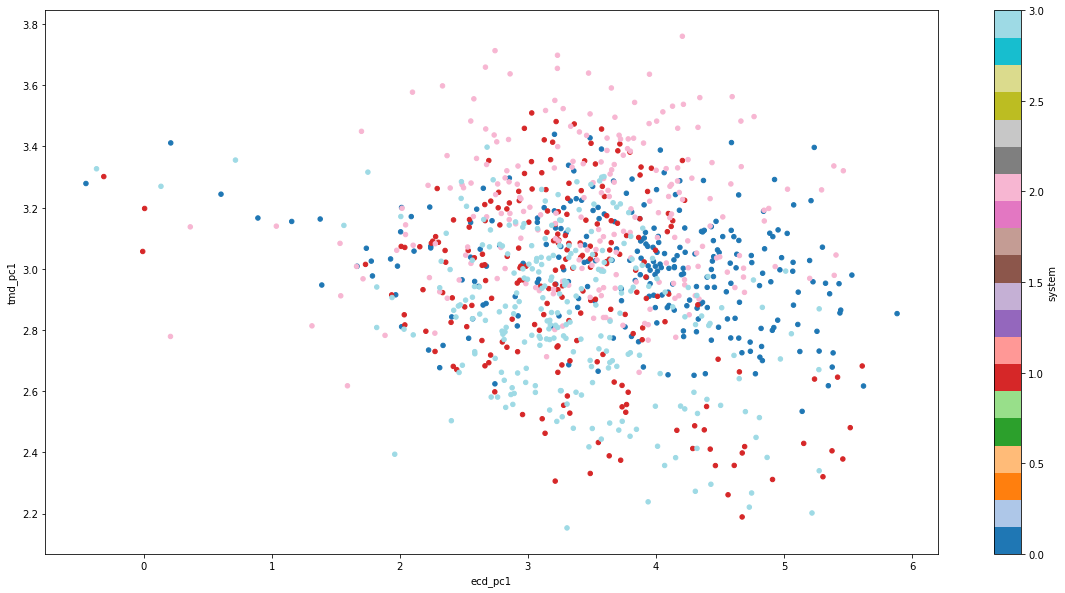

In [96]:
fig,ax = plt.subplots(figsize=(20,10))
md_data[md_data.system.isin(range(0,4))].plot(kind='scatter',x='ecd_pc1',y='tmd_pc1',c='system',colormap='Vega20',ax=ax)

In [24]:
md_data.columns

Index(['MD_name', 'pH', 'replicate', 'traj_time', 'system', 'rmsd', 'ecd_pc1',
       'ecd_pc2', 'tmd_pc1', 'tmd_pc2',
       ...
       'psi_cos[306, 307]', 'psi_cos[307, 308]', 'psi_cos[308, 309]',
       'psi_cos[309, 310]', 'psi_cos[310, 311]', 'psi_cos[311, 312]',
       'psi_cos[312, 313]', 'psi_cos[313, 314]', 'psi_cos[314, 315]',
       'M2_spread'],
      dtype='object', length=2223)

In [27]:
fontdict = {
            'rotation':'horizontal',
            'fontname':'Helvetica',
                 'size'   : 13

        }
labelfont = {'fontname':'Helvetica',
             'size'   : 15
            }
titlefont = {'fontname':'Helvetica',
            'weight' : 'bold',
             'size'   : 18
            }
lineplot = {'linewidth':3.0}
titleon = True

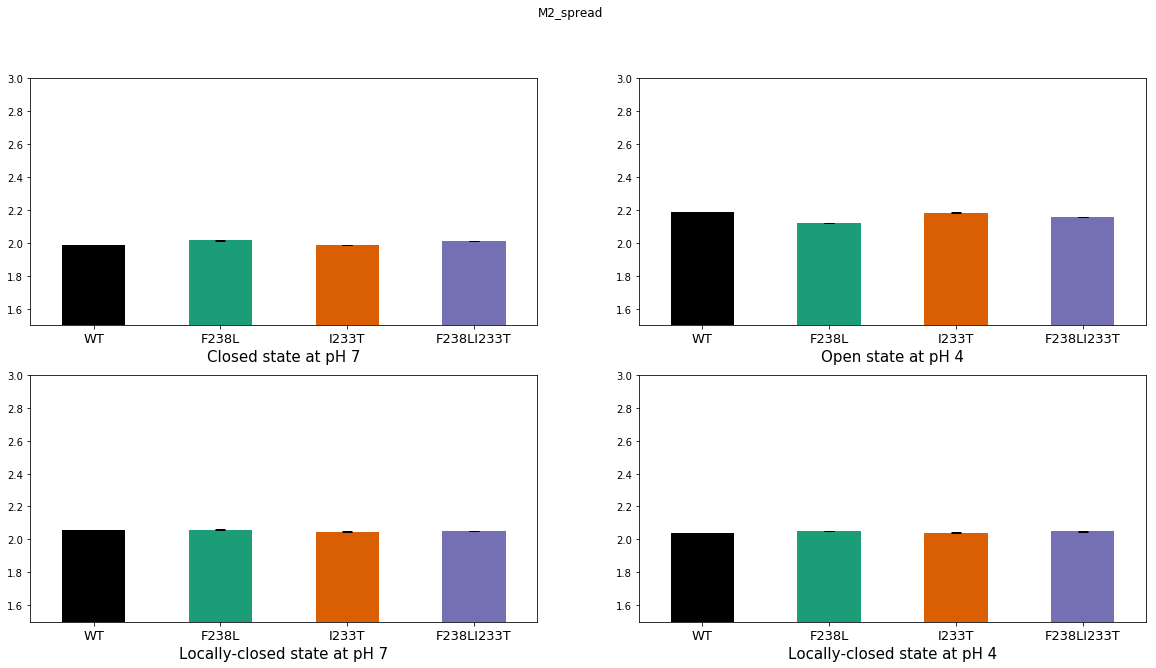

In [35]:
#create_hbond_data(200,239,'inter_water_bridge',md_data)
feature = 'M2_spread'
md_5NJY_70 = md_data[(md_data.system >= 0) & (md_data.system <= 3) & (md_data.dbscan == 0)]
md_5NJY_46 = md_data[(md_data.system >= 4) & (md_data.system <= 7) & (md_data.dbscan == 0)]
md_4HFI_46 = md_data[(md_data.system >= 8) & (md_data.system <= 11) & (md_data.dbscan == 0)]
md_4NPQ_70 = md_data[(md_data.system >= 12) & (md_data.system <= 15) & (md_data.dbscan == 0)]
md_WT = md_data[~md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('I233T') & (md_data.dbscan == 0)]
md_F238L = md_data[md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('F238LI233T') & (md_data.dbscan == 0)]
md_I233T = md_data[md_data.MD_name.str.contains('I233T') & ~md_data.MD_name.str.contains('F238LI233T') & (md_data.dbscan == 0)]
md_F238LI233T = md_data[md_data.MD_name.str.contains('F238LI233T') & (md_data.dbscan == 0)]
fig, ax = plt.subplots(2,2,figsize=(20, 10))

group = md_4NPQ_70.groupby(['MD_name','pH'],sort=False)[feature]
mean = group.mean()
errors = group.sem()
mean.plot(kind='bar',yerr=errors,ax=ax[0,0],color=['black','#1b9e77','#d95f02','#7570b3'],capsize=5)
ax[0,0].set_xticklabels(['WT','F238L','I233T','F238LI233T'],fontdict)
ax[0,0].set_xlabel('Closed state at pH 7',**labelfont)

group = md_4HFI_46.groupby(['MD_name','pH'],sort=False)[feature]
mean = group.mean()
errors = group.sem()
mean.plot(kind='bar',capsize=5,yerr=errors,ax=ax[0,1],color=['black','#1b9e77','#d95f02','#7570b3'])
ax[0,1].set_xticklabels(['WT','F238L','I233T','F238LI233T'],fontdict)
ax[0,1].set_xlabel('Open state at pH 4',**labelfont)

group = md_5NJY_70.groupby(['MD_name','pH'],sort=False)[feature]
mean = group.mean()
errors = group.sem()
mean.plot(kind='bar',capsize=5,yerr=errors,ax=ax[1,0],color=['black','#1b9e77','#d95f02','#7570b3'])
ax[1,0].set_xticklabels(['WT','F238L','I233T','F238LI233T'],fontdict)
ax[1,0].set_xlabel('Locally-closed state at pH 7',**labelfont)

group = md_5NJY_46.groupby(['MD_name','pH'],sort=False)[feature]
mean = group.mean()
errors = group.sem()
mean.plot(kind='bar',capsize=5,yerr=errors,ax=ax[1,1],color=['black','#1b9e77','#d95f02','#7570b3'])
ax[1,1].set_xticklabels(['WT','F238L','I233T','F238LI233T'],fontdict)
ax[1,1].set_xlabel('Locally-closed state at pH 4',**labelfont)
ax[0,0].set_ylim(1.5,3)
ax[0,1].set_ylim(1.5,3)
ax[1,0].set_ylim(1.5,3)
ax[1,1].set_ylim(1.5,3)
if titleon:

    plt.suptitle(feature)
plt.savefig('plots/' + feature + '.pdf')